### EGOR ZAITSEV - 07 452 541

### XIAOXU YAO - 07 498 897

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm

## Exercise 1: Univariate Problems

### Code the bisection algorithm for any function $f(x)$

In [65]:
def bisection(function, low, high, epsilon = 1e-4, sigma = 1e-4, numIter = 1000):
    """
    Finds a root of function in an interval [low, high] such that function(low) < 0 and function(high) > 0

    Arguments:
    
    function - continuous input function
    low - lower bound of domain
    high - upper bound of domain
    epsilon - distance betwee refined low and high
    sigma - function value at mid point
    numIter - maximum number of iterations

    Returns:

    mid - root of function such that f(mid) ~ 0 in interval [low, high]
    """
    if function(low) * function(high) < 0:
        for i in range(numIter):
            # check whether function(low) and function(high) have different signs
            mid = (low + high) / 2

            # shorten search domain by moving to mid point either from below or above
            if function(low) * function(mid) > 0:
                low = mid
            else:
                high = mid
            
            # check epsilon convergence or sigma convergence
            if high - low <= epsilon * (1 + abs(low) + abs(high)) or abs(function(mid)) <= sigma:
                return mid
    else:
        print('function(low) * function(high) > 0 => Define a better interval')

### Use bisection to compute the zeros of the functions

 1. $f(x)=x^3+4-\frac{1}{x}$

 2. $f(x)=-\exp(-x)+\exp(-x^2)$

In [24]:
def function1(x):
    return x**3 + 4 - 1/x

def function2(x):
    return -np.exp(-x) + np.exp(-x**2)

In [50]:
mid1 = bisection(function1, -2, -1)
mid2 = bisection(function2, 1/2, 2)

print('ROOT: {} <=> Bisection on function1 in an interval [-2, -1]'.format(mid1))
print('ROOT: {} <=> Bisection on function2 in an interval [1/2, 2]'.format(mid2))

ROOT: -1.663330078125 <=> Bisection on function1 in an interval [-2, -1]
ROOT: 1.000244140625 <=> Bisection on function2 in an interval [1/2, 2]


(-1.0, 1.0)

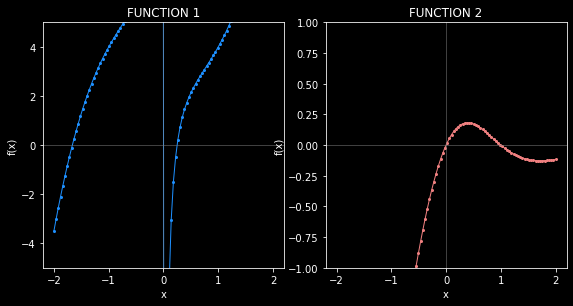

In [64]:
x = np.linspace(-2, 2, 100)
y1 = function1(x)
y2 = function2(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
ax1.plot(x, y1, color = 'dodgerblue', marker = 'o', markersize = 2, linewidth = 1)
ax1.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax1.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax1.title.set_text('FUNCTION 1')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_ylim(-5, 5)

ax2.plot(x, y2, color = 'lightcoral', marker='o', markersize = 2, linewidth = 1)
ax2.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax2.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax2.title.set_text('FUNCTION 2')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_ylim(-1, 1)

### Code the secant method for any function $f(x)$

In [73]:
def secant(function, x1, x2, tol = 1e-4, numIter = 1000):
    """
    Finds a root of function given two points x1 and x2

    Arguments:
    
    function - continuous input function
    x1 - initial point 1
    x2 - initial point 2
    tol - breakpoint tolerance
    numIter - maximum number of iterations

    Returns:
    z - root of function
    """
    fx1 = function(x1)
    fx2 = function(x2)

    for i in range(numIter):
        z = (x1 * fx2 - x2 * fx1) / (fx2 - fx1)

        if abs(function(z)) <= tol * (1 + function(z)):
            return z
        
        x1, x2  = x2, z
        fx1, fx2 = fx2, function(z)

    else:
        print('numIter exceeded. Current z is {}'.format(z))

### Use secant to compute the zeros of the functions

 1. $f(x)=x^2 + 10 - \frac{1}{x}$
 2. $f(x)=\exp(-x^2)$

In [68]:
def function3(x):
    return x**2 + 10 - 1/x

def function4(x):
    return np.exp(-x**2)

In [75]:
z3 = secant(function3, 0.1, 1)
z4 = secant(function4, 1/2, 2)

print('ROOT: {} <=> Secant on function3 given x1 = 0.1 and x2 = 1'.format(z3))
print('ROOT: {} <=> Secant on function4 in an interval [1/2, 2]'.format(z4))

ROOT: 0.09990030050935535 <=> Secant on function3 given x1 = 0.1 and x2 = 1
ROOT: 3.063995107434631 <=> Secant on function4 in an interval [1/2, 2]


(-0.1, 1.1)

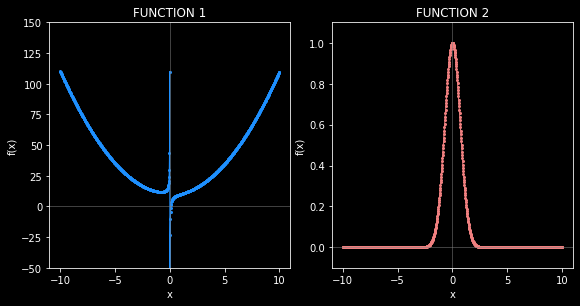

In [98]:
x3 = np.linspace(-10, 10, 1000)
x4 = np.linspace(-10, 10, 1000)
y3 = function3(x)
y4 = function4(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
ax1.plot(x3, y3, color = 'dodgerblue', marker = 'o', markersize = 2, linewidth = 1)
ax1.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax1.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax1.title.set_text('FUNCTION 1')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_ylim(-50, 150)

ax2.plot(x4, y4, color = 'lightcoral', marker='o', markersize = 2, linewidth = 1)
ax2.axhline(y = 0, color = 'gray', linewidth = 0.5)
ax2.axvline(x = 0, color = 'gray', linewidth = 0.5)
ax2.title.set_text('FUNCTION 2')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_ylim(-0.1, 1.1)

### Revisit the demand-supply example of problem set 1

$$\mathbf D\colon\quad p=q-bq$$

$$\mathbf S\colon\quad p=c+dq^\phi$$

where $p$ is the price, $q$ is the quantity, $ab,c,d,\phi$ are some parameters.


 1. Write it as a univariate problem

 $$bq+dq^\phi-(a-c)=0$$

In [100]:
def supplyDemand(q, a = 3, b = 1/2, c = 1, d = 1, phi = 1/2):
    return b * q + d * q**phi - (a - c)


  2. Parametrize the model with $a=3, b=0.5, c=d=1, \phi=1/2$. Compute the solution analytically.

Let $\tilde{q}=q^{\frac{1}{2}}$ hence

$$\frac{1}{2}\tilde{q}^2+\tilde{q}-2=0$$

Solutions to this quadratic equations are

$$\tilde{q}_1=\sqrt{5}-1\quad\tilde{q}_2=-\sqrt{5}-1$$

Hence, the only solution $q_1$ is given by

$$q_1=(\sqrt{5}-1)^2=6-2\sqrt{5}$$

3. Compute the solutions with your bisection algorithm

In [112]:
q = bisection(supplyDemand, 1, 4)

In [113]:
print('ROOT: {} <=> Bisection on supplyDemand in interval [1, 3]'.format(q))

ROOT: 1.5277099609375 <=> Bisection on supplyDemand in interval [1, 3]


## Exercise 2: A Contribution to the Empirics of Economic Growth

 1. Load the data set and delete countries with missing values

In [2]:
df = pd.read_excel('../Helpers/MRW92QJE-data.xls', header = 0)
df = df.dropna()
df.head(10)

,country number,country name,Non-oil,intermediate,oecd,gdp/adult 1960,gdp/adult 1985,growth gdp,growth working age pop,I/y,school
0,1,Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5
1,2,Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8
2,3,Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8
3,4,Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9
4,5,Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4
5,6,Burundi,1,0,0,755.0,663.0,1.2,1.7,5.1,0.4
6,7,Cameroon,1,1,0,889.0,2190.0,5.7,2.1,12.8,3.4
7,8,Central African Republic,1,0,0,838.0,789.0,1.5,1.7,10.5,1.4
8,9,Chad,1,0,0,908.0,462.0,-0.9,1.9,6.9,0.4
9,10,"Congo, Peoples Republic",1,0,0,1009.0,2624.0,6.2,2.4,28.8,3.8


2. Generate sub-samples for non-oil countries, intermediate countries and OECD countries

In [3]:
nonOil = df[df['Non-oil'] == 1]
intermediate = df[df['intermediate'] == 1]
oecd = df[df['oecd'] == 1]

3. For each sub-sample compute the regression coefficients and respective standard error for the following regression model

$$\begin{aligned}\log(\text{gdp}1985_j)-\log(\text{gdp}1960_j)&=\beta_0+\beta_1\log(\text{gdp}1960_j)\\&+\beta_2\log\biggr(\frac{\text{investment}}{\text{gdp}_j}\biggr)\\&+\beta_3\log(\text{popgrowth}_j+g+\delta)\\&+\beta_4\log(\text{schoolenrol}_j)+\epsilon_j\end{aligned}$$

where $g+\delta=0.05$.

In [11]:
results = []
gdelta = 0.05
for data in [nonOil, intermediate, oecd]:

    y = np.log(data['gdp/adult 1985'] / 100) - np.log(data['gdp/adult 1960'] / 100) # log
    y = np.array(y).reshape(-1, 1)

    intercept = np.ones(len(y))
    x1 = np.log(data['gdp/adult 1960'] / 100)
    x2 = np.log(data['I/y'] / 100)
    x3 = np.log(data['growth working age pop'] / 100 + gdelta)
    x4 = np.log(data['school'] / 100)
    X = np.matrix([intercept, x1, x2, x3, x4])

    model = sm.OLS(y, X.T)
    results.append(model.fit())

In [12]:
print('RESULTS FOR NON-OIL')
results[0].summary()

RESULTS FOR NON-OIL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     21.94
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           8.99e-13
Time:                        20:33:42   Log-Likelihood:                -26.952
No. Observations:                  98   AIC:                             63.90
Df Residuals:                      93   BIC:                             76.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6935      0.760      2.228      0.028       0.184       3.203
x1            -0.2884      0.062     -4.683      0.000      -0.411      -0.166
x2             0.5237      0.087      6.029      0.000       0.351       0.696
x3            -0.5057      0.289     -1.752      0.083      -1.079       0.067
x4             0.2311      0.059      3.887      0.000       0.113       0.349
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.518
Skew:                          -0.153   Prob(JB):                        0.468
Kurtosis:                       3.528   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print('RESULTS FOR INTERMEDIATE')
results[1].summary()

RESULTS FOR INTERMEDIATE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     15.23
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           5.26e-09
Time:                        20:33:43   Log-Likelihood:                -14.635
No. Observations:                  75   AIC:                             39.27
Df Residuals:                      70   BIC:                             50.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0235      0.808      2.505      0.015       0.412       3.635
x1            -0.3660      0.067     -5.427      0.000      -0.500      -0.231
x2             0.5376      0.102      5.255      0.000       0.334       0.742
x3            -0.5450      0.288     -1.890      0.063      -1.120       0.030
x4             0.2705      0.080      3.365      0.001       0.110       0.431
==============================================================================
Omnibus:                        6.278   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                9.147
Skew:                          -0.208   Prob(JB):                       0.0103
Kurtosis:                       4.659   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print('RESULTS FOR OECD')
results[2].summary()

RESULTS FOR OECD


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     10.80
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           0.000152
Time:                        20:33:45   Log-Likelihood:                 13.798
No. Observations:                  22   AIC:                            -17.60
Df Residuals:                      17   BIC:                            -12.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9239      1.051      0.879      0.392      -1.293       3.141
x1            -0.3977      0.070     -5.668      0.000      -0.546      -0.250
x2             0.3318      0.173      1.914      0.073      -0.034       0.698
x3            -0.8634      0.338     -2.557      0.020      -1.576      -0.151
x4             0.2277      0.145      1.570      0.135      -0.078       0.534
==============================================================================
Omnibus:                        1.879   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.098
Skew:                           0.547   Prob(JB):                        0.578
Kurtosis:                       3.009   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""